# Exploratory Data Analysis of Engineered Features

Observations:
* Moderate to weak visual correlations between engineered features and targets
* Score of first assessment looks to have a sigificant collelation with estimated final score, final outcome
* Individual distributions show a lot of 0 values, unsurprising otherwise

In [7]:
import numpy as np 
import pandas as pd
import seaborn as sns
sns.reset_defaults
sns.set_style(style='whitegrid')
sns.set_context(context='poster')
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
font = {'size'   : 16}
plt.rc('font', **font)
plt.ion()
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True
plt.rcParams["figure.figsize"] = (20.0, 10.0)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 2000)# reg_df = pd.read_csv('../data/raw/studentRegistration.csv')
# reg_df = pd.read_csv('../data/raw/studentRegistration.csv')

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, confusion_matrix, recall_score, roc_auc_score, roc_curve, recall_score, classification_report, precision_recall_curve, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
def scale_subset(df, columns):
    '''
    Use sklearn StandardScalar to scale only numeric columns.

    Parameters:
    ----------
    input {dataframe, list}: dataframe containing mixed feature variable types, list of names of numeric feature columns
    output: {dataframe}: dataframe with numeric features scaled and categorical features unchanged

    '''
    scalar = StandardScaler()
    numeric = df[columns]
    categorical = df.drop(columns, axis = 1)
    scalar.fit(numeric)
    num_scaled = pd.DataFrame(scalar.transform(numeric))
    num_scaled.rename(columns = dict(zip(num_scaled.columns, numeric_cols)), inplace = True)
    return pd.concat([num_scaled, categorical], axis = 1)

In [4]:
df = pd.read_csv('../data/processed/transformed_data_with_features.csv')

Looking for data leakage

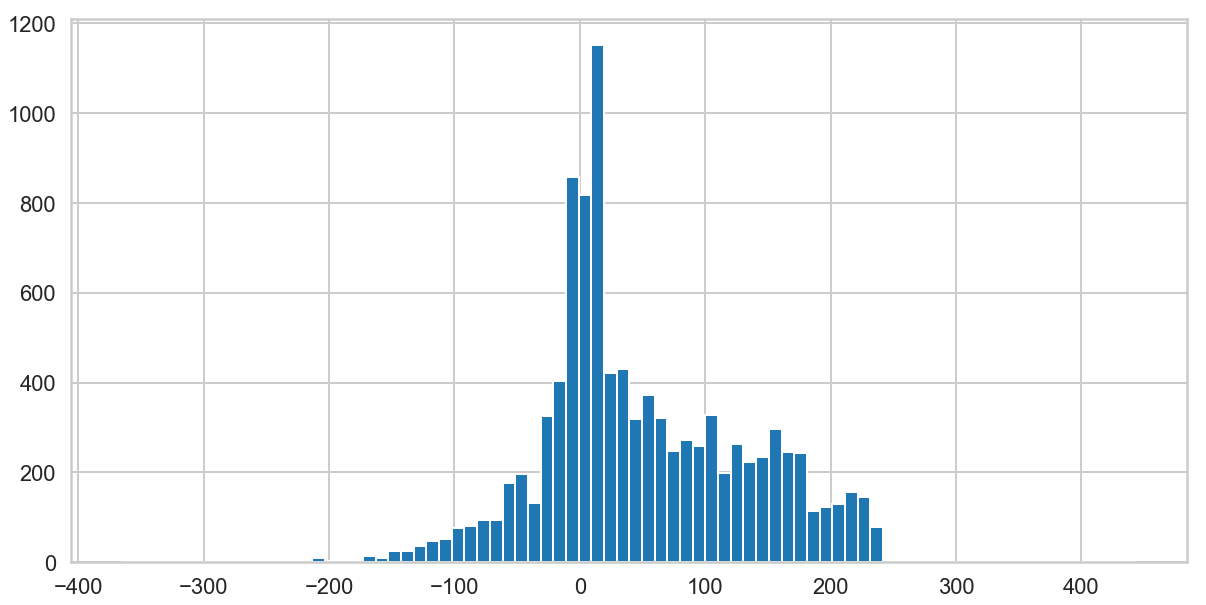

In [17]:
df['date_unregistration'].hist(bins=80)

In [16]:
df[df['date_unregistration'] <= 25].shape

(4823, 62)

In [11]:
df['days_early_first_assessment'].isna().sum()

6774

In [89]:
df = df.fillna(value=0)

In [90]:
df.shape

(32630, 62)

In [57]:
df = df[df['date_unregistration'] >= 0]

## Single vs Double Modules

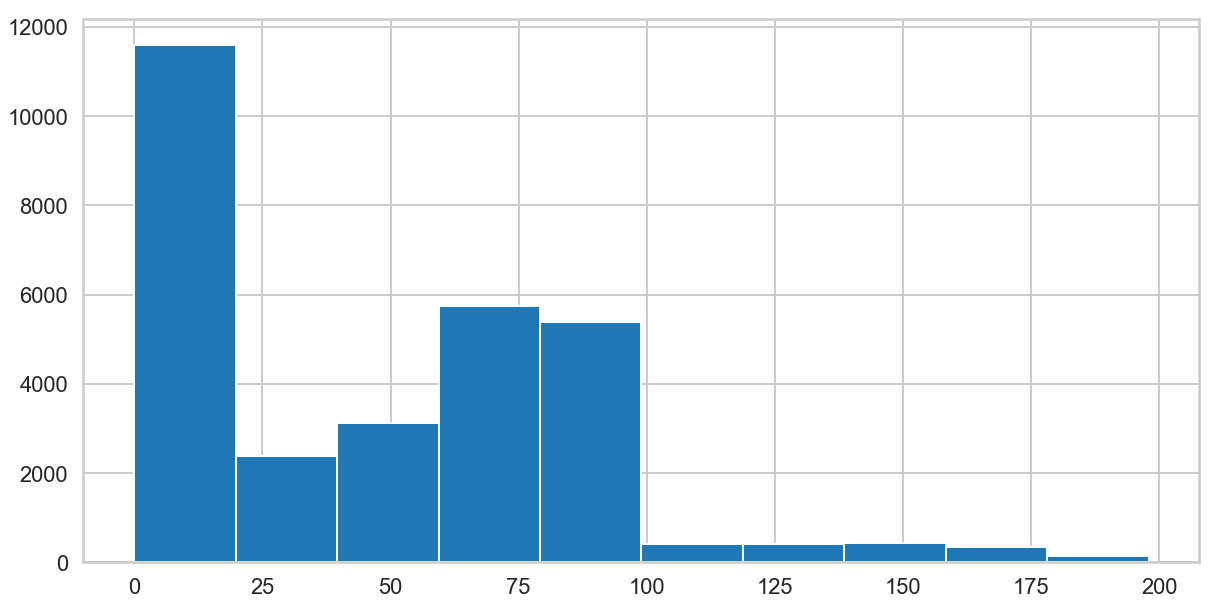

In [58]:
plt.hist(df['estimated_final_score'])
plt.show()

In [86]:
df[df['estimated_final_score'] > 100]['code_module_DDD'].sum()

1696

Of students with a score higher that 100, 1696 were in module DDD

In [102]:
df[df['estimated_final_score'] > 100].shape

(1696, 62)

In [127]:
subdf = df[(df['code_module_DDD'] == 1) & (df['estimated_final_score'] > 100)][['code_presentation_2013J',
       'code_presentation_2014B', 'code_presentation_2014J', 'code_presentation_nan']]

In [132]:
subdf.columns

Index(['code_presentation_2013J', 'code_presentation_2014B',
       'code_presentation_2014J', 'code_presentation_nan'],
      dtype='object')

In [137]:
for col in subdf.columns:
    print(sum(subdf[col]))

802
442
0
0


**Conclusion: Double modules are code DDD, presenation 2013J, 2014B**

Changing the values:

In [105]:
index_list = []
for index, row in df.iterrows():
    if row['code_module_DDD'] == 1:
        index_list.append(index)
#         row['estimated_final_score'] = row['estimated_final_score'] * 0.5

In [107]:
len(index_list)

6272

(array([14278.,  2388.,  3114.,  5735.,  5388.,   408.,   417.,   431.,
          341.,   130.]),
 array([  0.  ,  19.79,  39.58,  59.37,  79.16,  98.95, 118.74, 138.53,
        158.32, 178.11, 197.9 ]),
 <a list of 10 Patch objects>)

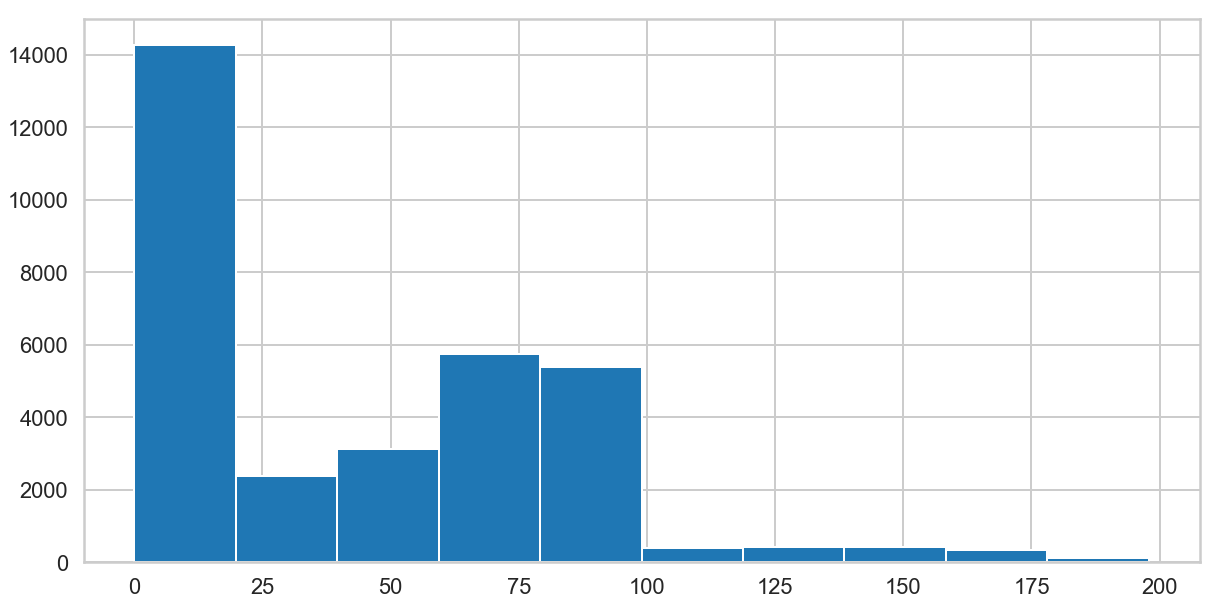

In [97]:
plt.hist(df['estimated_final_score'])

In [74]:
df.columns

Index(['id_student', 'num_of_prev_attempts', 'studied_credits', 'final_result',
       'date_unregistration', 'module_not_completed', 'final_result_num',
       'clicks_per_day', 'pct_days_vle_accessed', 'max_clicks_one_day',
       'first_date_vle_accessed', 'avg_score', 'avg_days_sub_early',
       'estimated_final_score', 'days_early_first_assessment',
       'score_first_assessment', 'code_module_BBB', 'code_module_CCC',
       'code_module_DDD', 'code_module_EEE', 'code_module_FFF',
       'code_module_GGG', 'code_module_nan', 'code_presentation_2013J',
       'code_presentation_2014B', 'code_presentation_2014J',
       'code_presentation_nan', 'gender_M', 'gender_nan',
       'region_East Midlands Region', 'region_Ireland', 'region_London Region',
       'region_North Region', 'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Y

In [60]:
X = df.drop(['id_student', 'date_unregistration', 'module_not_completed', 'score_above_100', 'final_result', 'score_above_100'], axis =1)
y = df['score_above_100']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [62]:
numeric_cols = ['num_of_prev_attempts', 'studied_credits', 'clicks_per_day', 'pct_days_vle_accessed','max_clicks_one_day','first_date_vle_accessed', 'avg_score', 'avg_days_sub_early','days_early_first_assessment', 'score_first_assessment']

In [51]:
#     X_train.fillna(value = 0, inplace = True)
#     y_train.fillna(value = 0, inplace = True)
# #     X_train = scale_subset(X_train, numeric_cols)
#     X_test.fillna(value = 0, inplace = True)
#     y_test.fillna(value = 0, inplace = True)
# #     X_test = scale_subset(X_test, numeric_cols)

/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app
/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the do

In [63]:
rf = RandomForestClassifier()

In [64]:
rf.fit(X_train, y_train)

/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
pred = rf.predict(X_test)

In [69]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9348
        True       1.00      1.00      1.00       537

   micro avg       1.00      1.00      1.00      9885
   macro avg       1.00      1.00      1.00      9885
weighted avg       1.00      1.00      1.00      9885



In [71]:
print(confusion_matrix(y_test, pred))

[[9348    0]
 [   2  535]]


In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
df[(df['date_unregistration'].isnull())].shape

In [ ]:
df.fillna(value=0, inplace=True)

In [ ]:
df.corr()

In [ ]:
df.columns

## Engineered Feature Analysis

### Bivariate Plots Against Targets: final_result_num, estimated_final_score

In [ ]:
sns.jointplot(x='clicks_per_day', y='final_result_num', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='clicks_per_day', y='estimated_final_score', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='pct_days_vle_accessed', y='final_result_num', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='pct_days_vle_accessed', y='estimated_final_score', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='studied_credits', y='final_result_num', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='studied_credits', y='estimated_final_score', data=df, size=12, alpha=0.2)

In [ ]:
df.columns

In [ ]:
sns.jointplot(x='max_clicks_one_day', y='final_result_num', data=df, size=12, alpha=0.5)

In [ ]:
sns.jointplot(x='max_clicks_one_day', y='estimated_final_score', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='first_date_vle_accessed', y='final_result_num', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='first_date_vle_accessed', y='estimated_final_score', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='avg_days_sub_early', y='final_result_num', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='avg_days_sub_early', y='estimated_final_score', data=df, size=12, alpha=0.2)

In [ ]:
df.columns

In [ ]:
sns.jointplot(x='days_early_first_assessment', y='final_result_num', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='days_early_first_assessment', y='estimated_final_score', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='score_first_assessment', y='final_result_num', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='score_first_assessment', y='estimated_final_score', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='avg_score', y='final_result_num', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='avg_score', y='estimated_final_score', data=df, size=12, alpha=0.1)

### Univariate Plots of Engineered Features

In [18]:
df.columns

Index(['id_student', 'num_of_prev_attempts', 'studied_credits', 'final_result',
       'date_unregistration', 'module_not_completed', 'final_result_num',
       'clicks_per_day', 'pct_days_vle_accessed', 'max_clicks_one_day',
       'first_date_vle_accessed', 'avg_score', 'avg_days_sub_early',
       'estimated_final_score', 'days_early_first_assessment',
       'score_first_assessment', 'code_module_BBB', 'code_module_CCC',
       'code_module_DDD', 'code_module_EEE', 'code_module_FFF',
       'code_module_GGG', 'code_module_nan', 'code_presentation_2013J',
       'code_presentation_2014B', 'code_presentation_2014J',
       'code_presentation_nan', 'gender_M', 'gender_nan',
       'region_East Midlands Region', 'region_Ireland', 'region_London Region',
       'region_North Region', 'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Y

In [19]:
f = list(df.columns[[1,2,4,6,7,8,9,10,11,12,13,14,15,16]])

/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


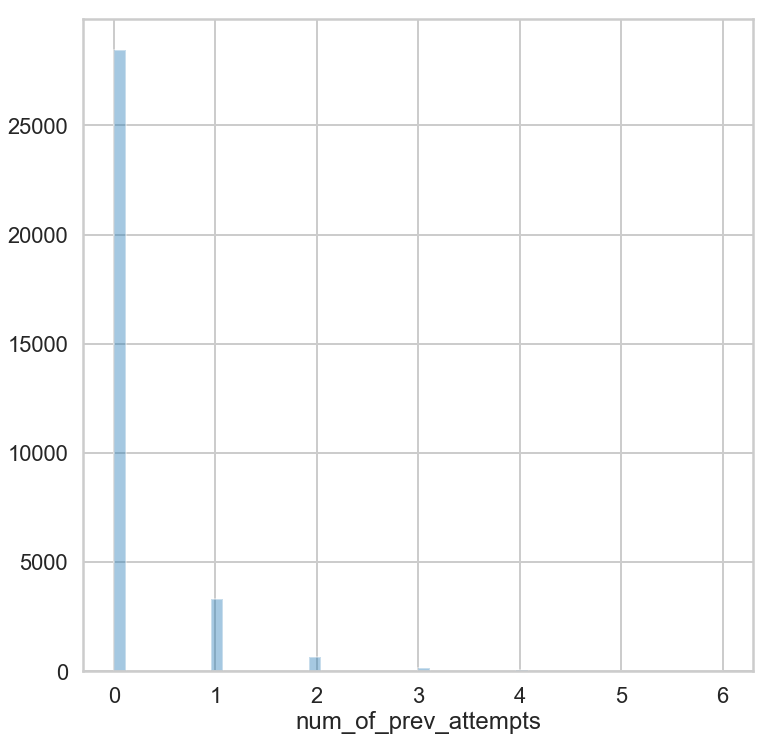

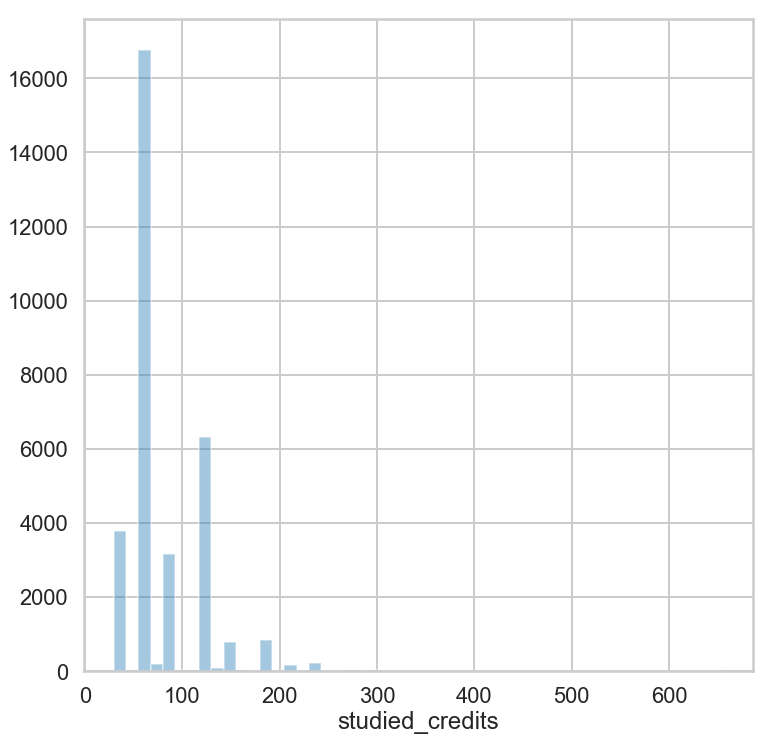

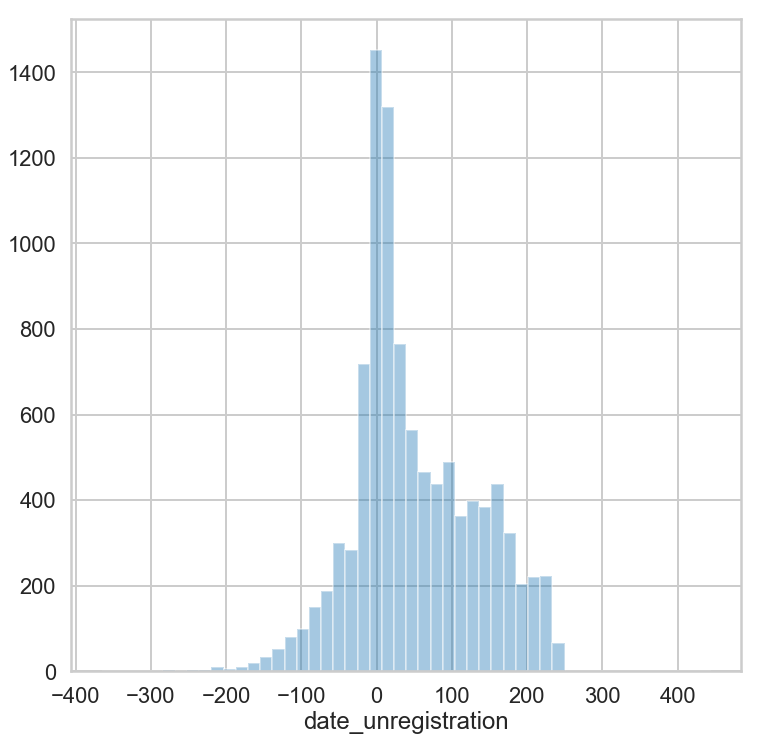

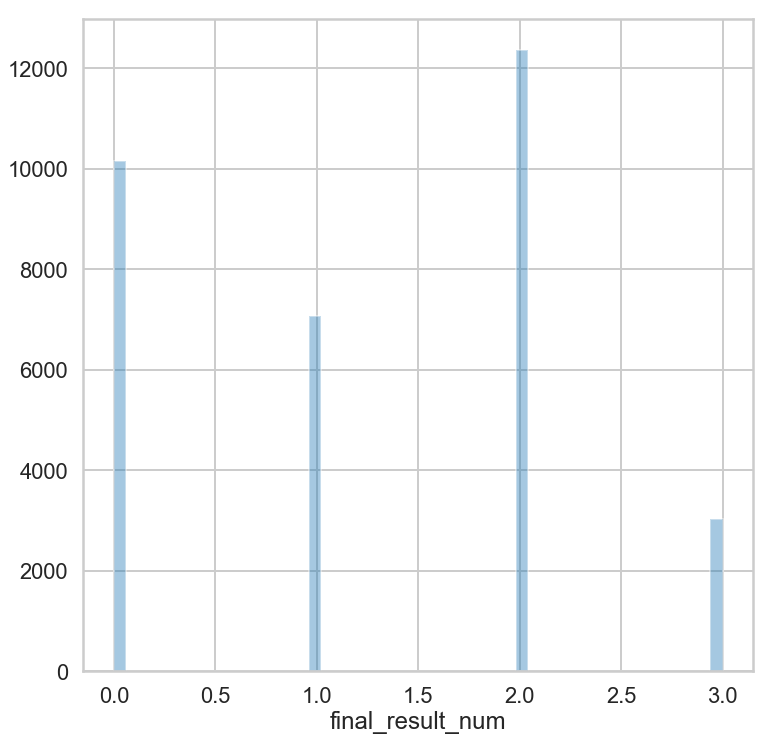

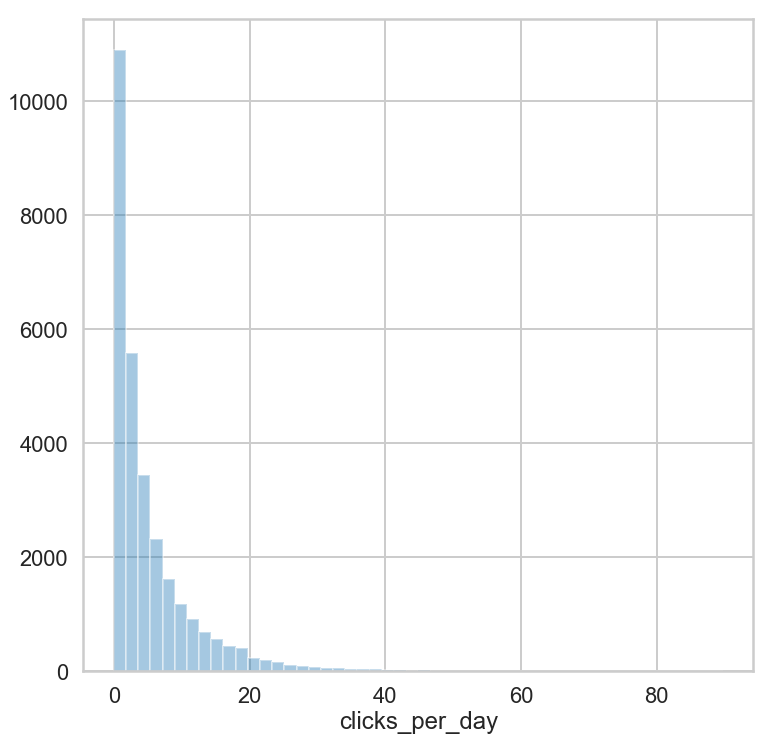

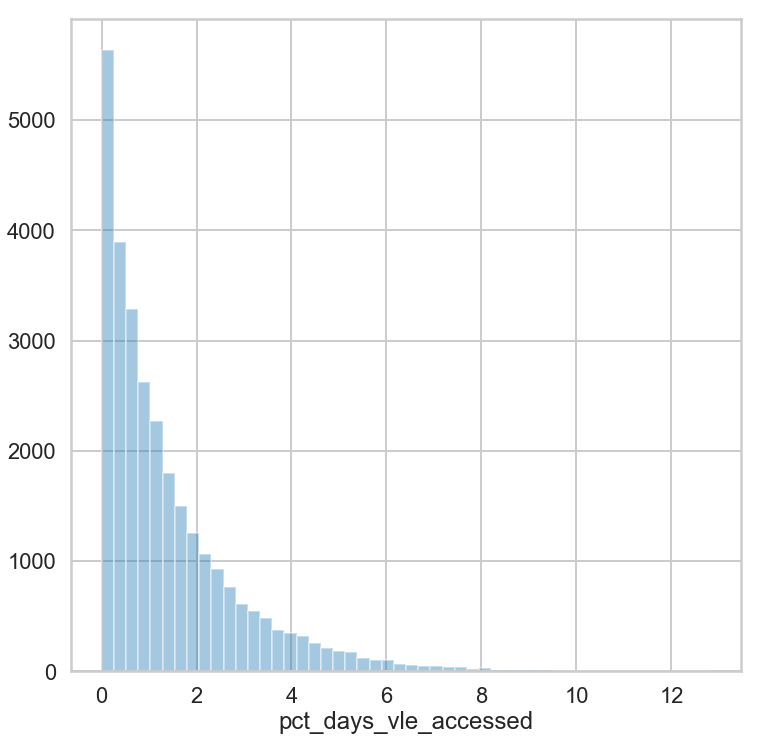

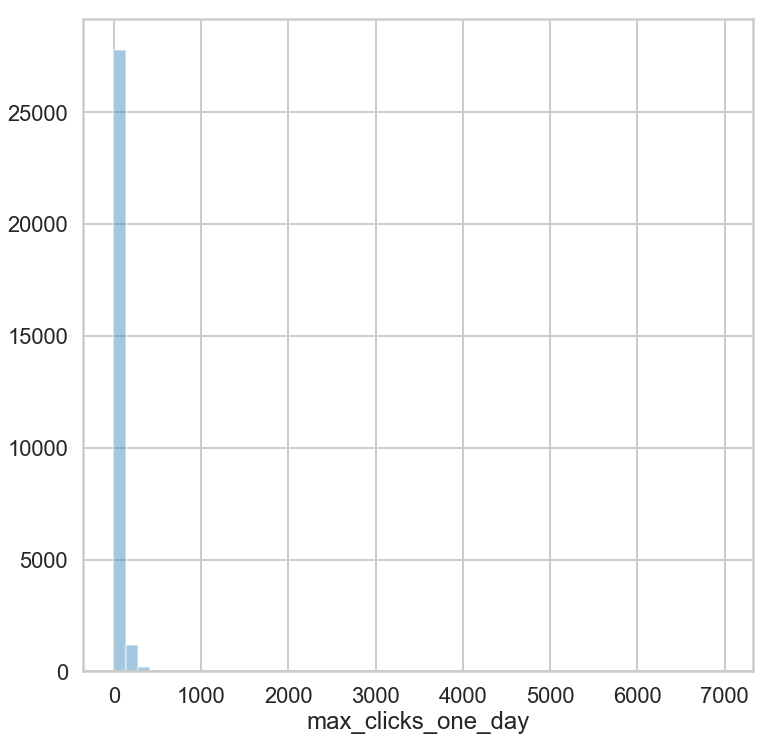

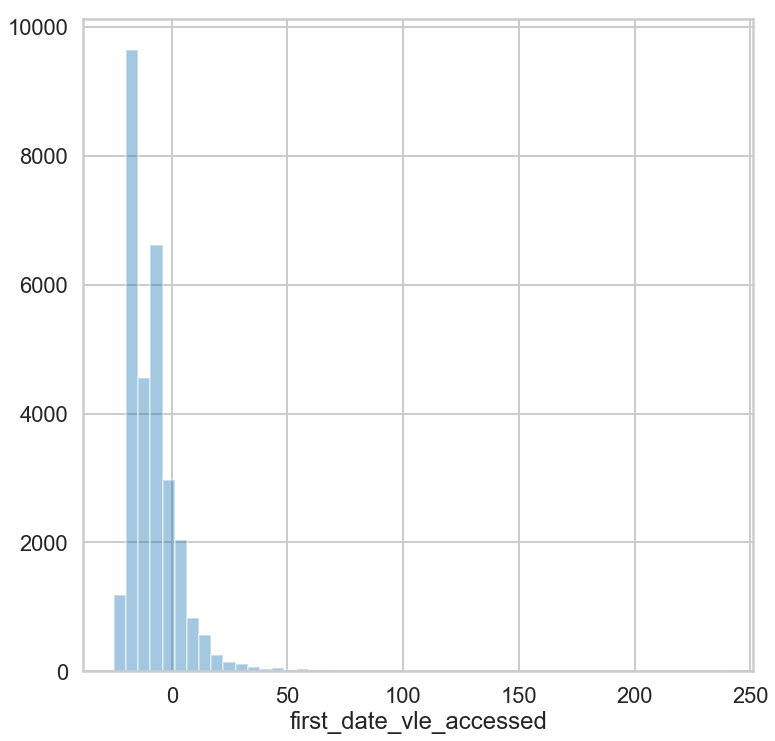

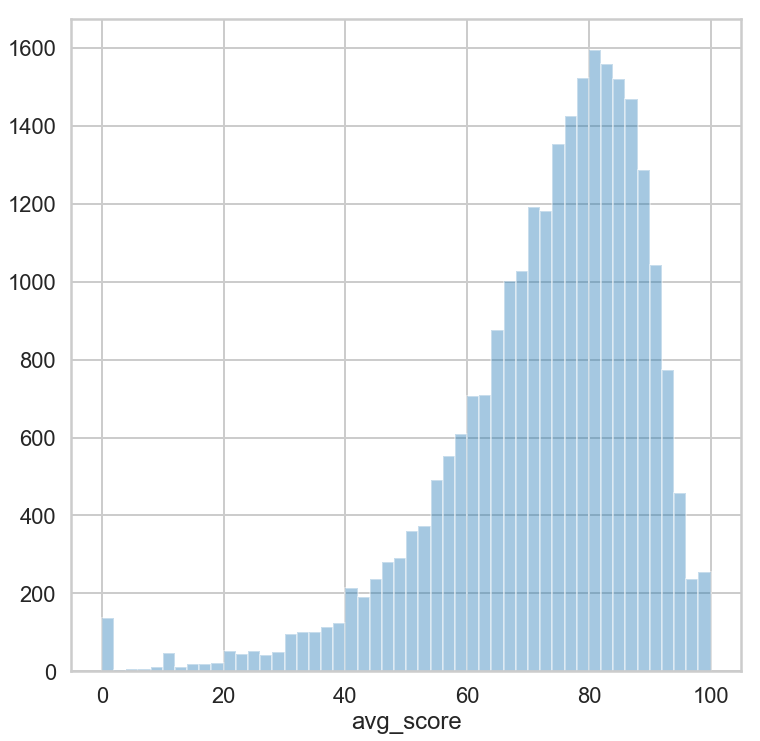

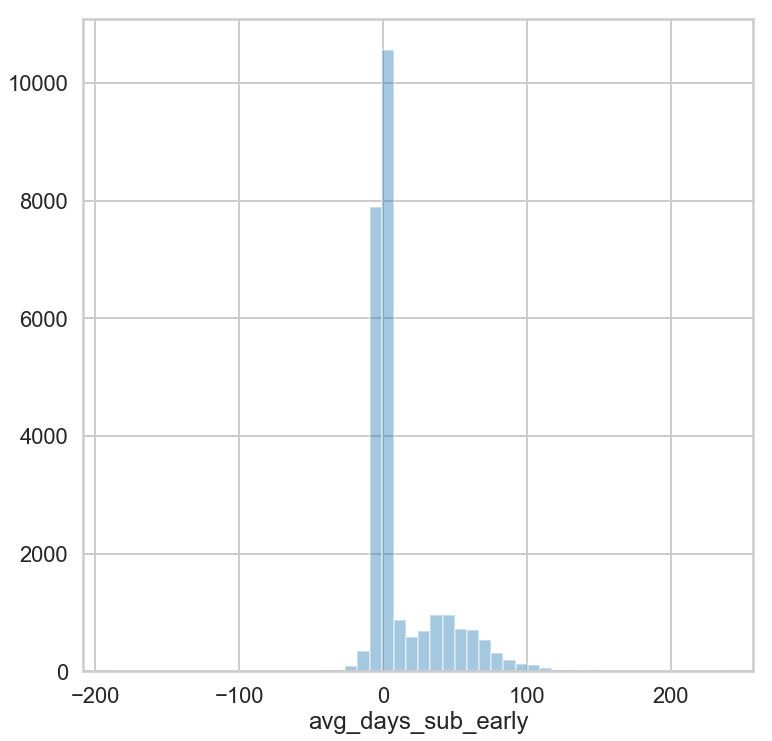

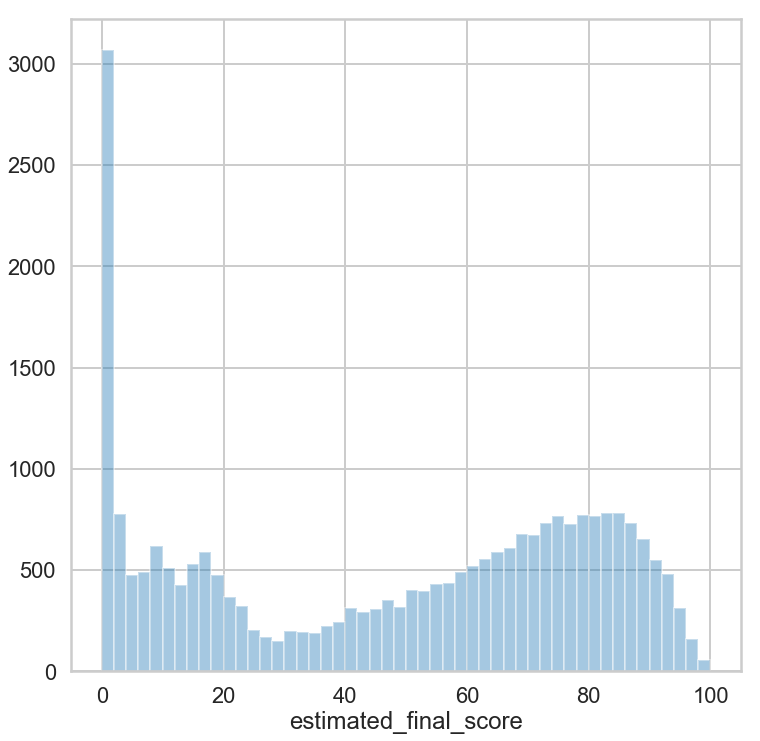

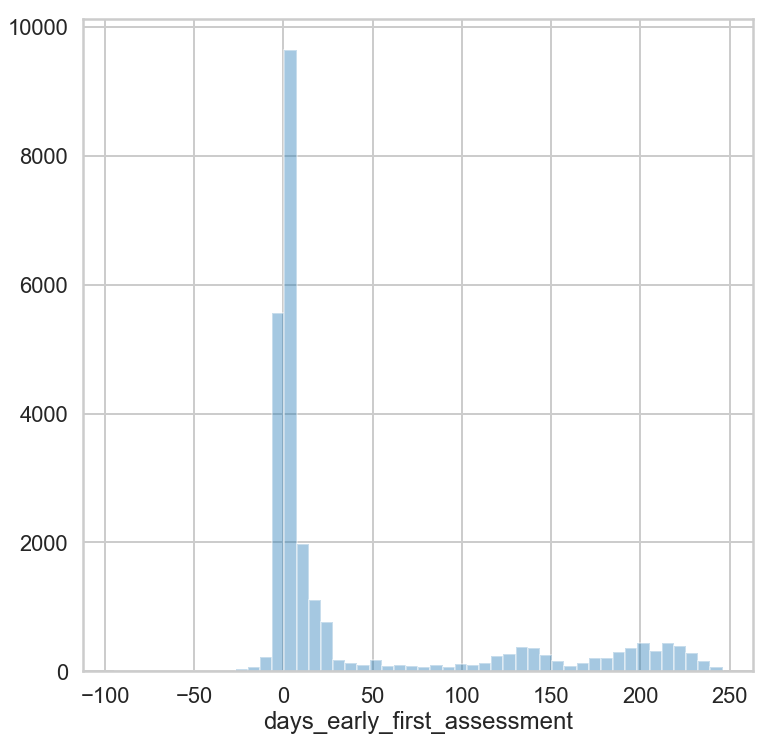

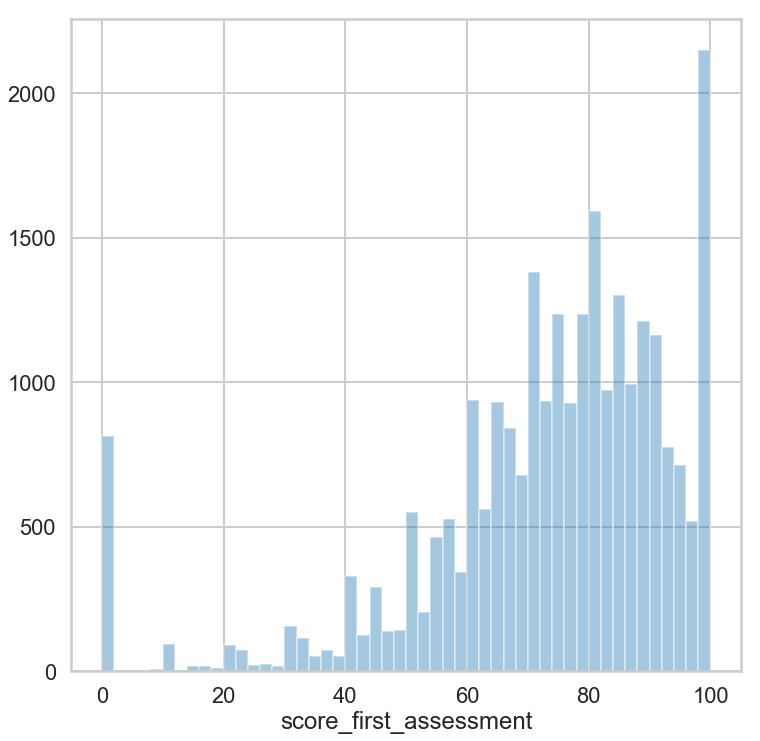

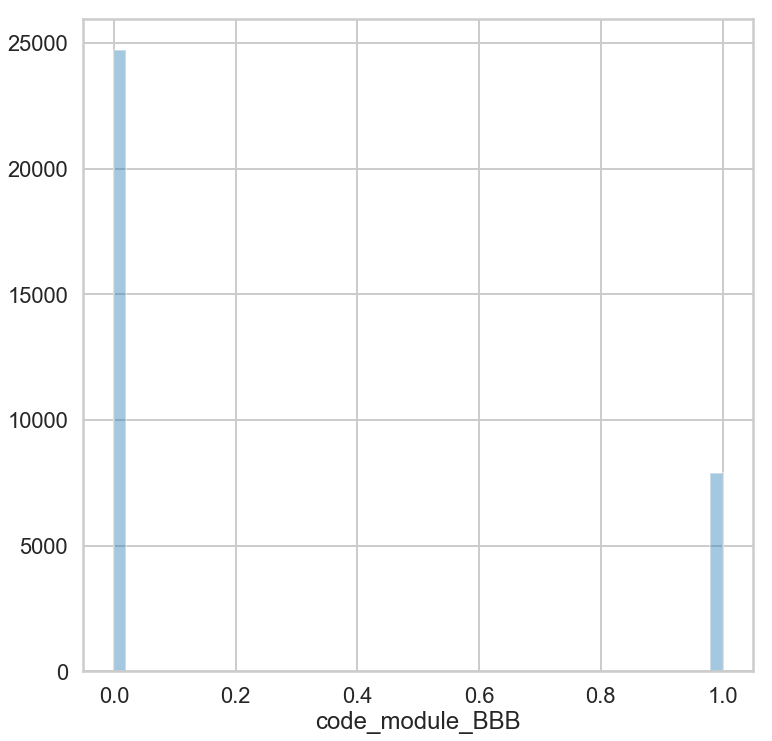

In [20]:
for feat in f:
    plt.figure(figsize=(12,12))
    sns.distplot(df[feat], bins=50, kde=False)